# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/My Drive/Python/Project1_FoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

# Ignore if any warnings
warnings.filterwarnings("ignore")

# Created a dataset excluding order_id and customer_id columns for further analysis
food_orders = df[['restaurant_name','cuisine_type','cost_of_the_order','day_of_the_week','rating','food_preparation_time','delivery_time']]

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Get the shape of the dataset
df.shape

# Get the number of rows and columns from the dataset and print
rows_count = df.shape[0]
cols_count = df.shape[1]

print('The total number of rows present in the dataset:', rows_count)
print('The total number of columns present in the dataset:', cols_count)

The total number of rows present in the dataset: 1898
The total number of columns present in the dataset: 9


**Observations:**
* The dataset contains 1898 rows and 9 columns in total.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations:**
* It can be noted that the dataset contains 4 columns with object datatype and 5 columns with numerical datatype.

* Since all columns have 1898 observations, it can be deduced that there are no missing values in the dataset.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Check the missing/null values in the dataset
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**Observations:**
* The dataset does not contain any missing or null values and each of the columns has 1898 observations.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Check the statistical summary of the data. (include='all') parameter helps to display the statistical summary of both the numerical and categorical data.
df.describe(include='all').T

# Get the Minimum of food_preparation_time
print('The Minimum time taken for food preparation is:', df['food_preparation_time'].min())

# Get the Average/Mean of food_preparation_time
print('The Average/Mean time taken for food preparation is:', df['food_preparation_time'].mean().round(2))

# Get the Maximum of food_preparation_time
print('The Maximum time taken for food preparation is:', df['food_preparation_time'].max())

df.describe(include='all').T

The Minimum time taken for food preparation is: 20
The Average/Mean time taken for food preparation is: 27.37
The Maximum time taken for food preparation is: 35


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


**Observations:**
* The minimum time required for food preparation is 20 minutes, while the average/mean time is 27.37 minutes and the maximum time is 35 minutes.

* The order_id and customer_id columns in our dataset serve as unique identifiers and do not provide any added value to our analysis when determining mean, min, or max.

* There are 178 distinct restaurants in our dataset, with Shake Shack having the most orders at 219.

* American cuisine has been ordered 584 times among the 14 different types of cuisines in our dataset.

* The average cost of an order is approximately 16.5 dollars, with the minimum being around 4.5 dollars and the maximum being around 35 dollars.

* Approximately 71% of orders are placed on weekends, specifically Saturdays and Sundays.

* Around 39% of customers do not provide a rating for their orders.

* On average, food preparation time is around 27 minutes, with minimum and maximum preparation times of 20 and 35 minutes, respectively.

* Delivery time takes an average of 24 minutes, with minimum and maximum delivery times of 15 and 33 minutes, respectively.

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Get the number of orders not rated
print('The Number of Non-Rated Orders are:', len(df[df['rating'] == 'Not given']))
df[df['rating'] == 'Not given']

The Number of Non-Rated Orders are: 736


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


#### Observations:
* Non-Rated Orders account for 38.8% of the total orders, with a count of 736 out of 1898 orders.

* The unique identifiers, order_id and customer_id columns, do not provide any additional value for further Exploratory Data Analysis (EDA) purposes.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Explore the numerical variables first.**

#####**Observations on Cost of the Order**

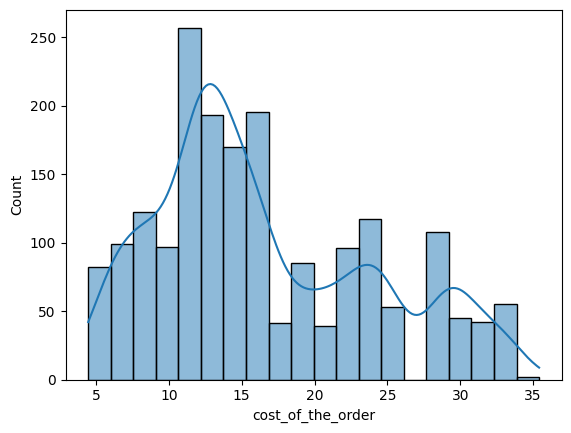

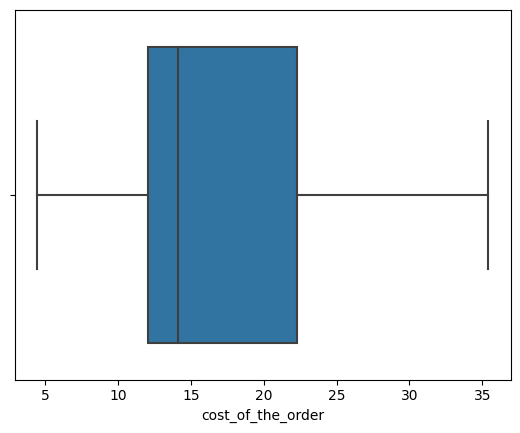

In [9]:
sns.histplot(data=df, x='cost_of_the_order', kde=True, bins=20)
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

**Observations:**
* The cost_of_the_order is positively skewed towards the right, indicating that the majority of orders have a lower cost, and a few orders have a higher cost.

* No outliers were found in the cost_of_the_order variable, suggesting that the data is within a reasonable range of values.

* The median value of cost_of_the_order is approximately 14 dollars, indicating that half of the orders cost less than 14 dollars, and half cost more.

* The maximum cost of an order paid by a customer is approximately 35 dollars, indicating that no customer has paid more than 35 dollars for an order.

#####**Observations on Food Preparation Time**

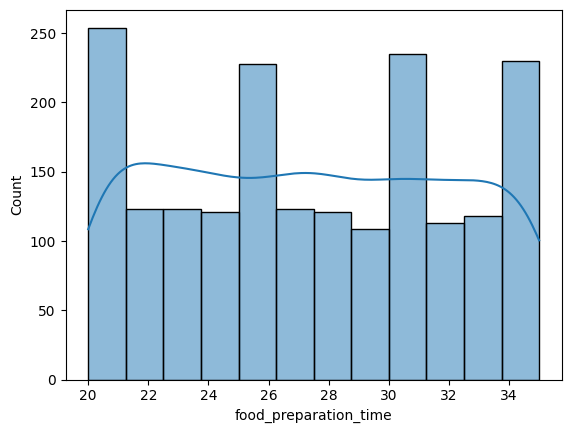

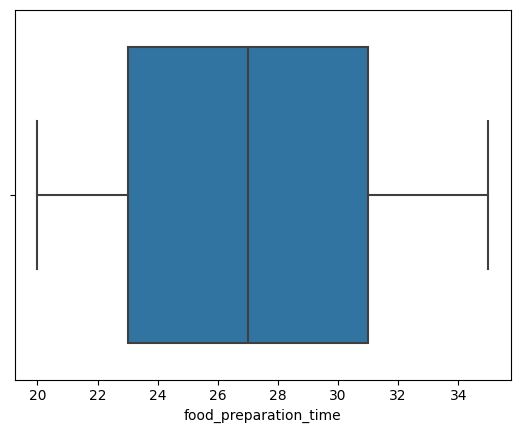

In [10]:
sns.histplot(data=df, x='food_preparation_time', kde=True)
# sns.countplot(data=df, x='food_preparation_time')
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

**Observations:**
* The histplot suggests that the food_preparation_time variable follows a normal distribution.

* The boxplot shows that the median value of food_preparation_time is around 27 minutes, with the minimum and maximum values being around 20 and 35 minutes, respectively.

* Approximately 50% of the food preparation times for the orders are less than the median value of 27 minutes.

* Based on the boxplot, there are no outliers in the food_preparation_time variable.

#####**Observations on Delivery Time**

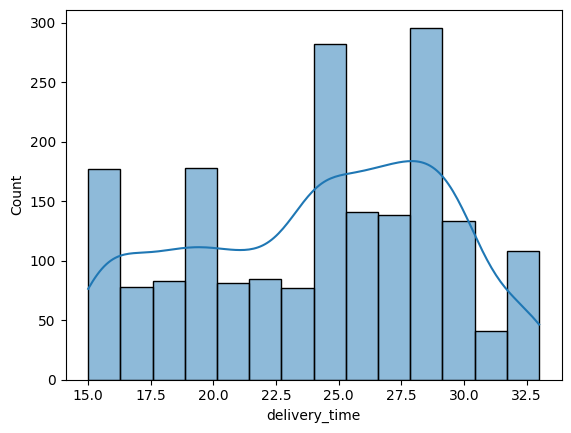

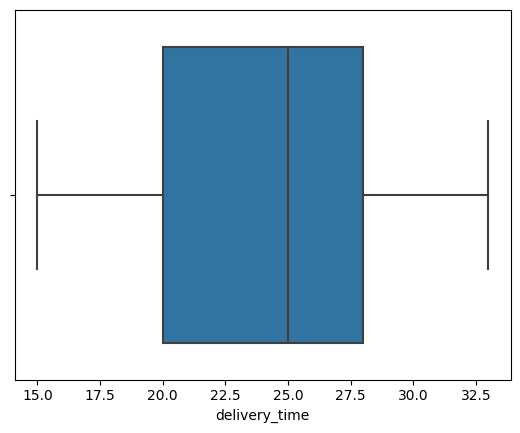

In [11]:
sns.histplot(data=df, x='delivery_time', kde=True)
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

**Observations:**
* The histogram and boxplot reveal that the delivery_time follows a left-skewed distribution.

* The delivery_time dataset shows that the delivery person takes a minimum of 15 minutes and an average of 24 minutes to deliver the food package.

* Based on the boxplot, there are no outliers present in the delivery_time variable.

**Let's explore the categorical variables now**

#####**Observations on Restaurant Name**

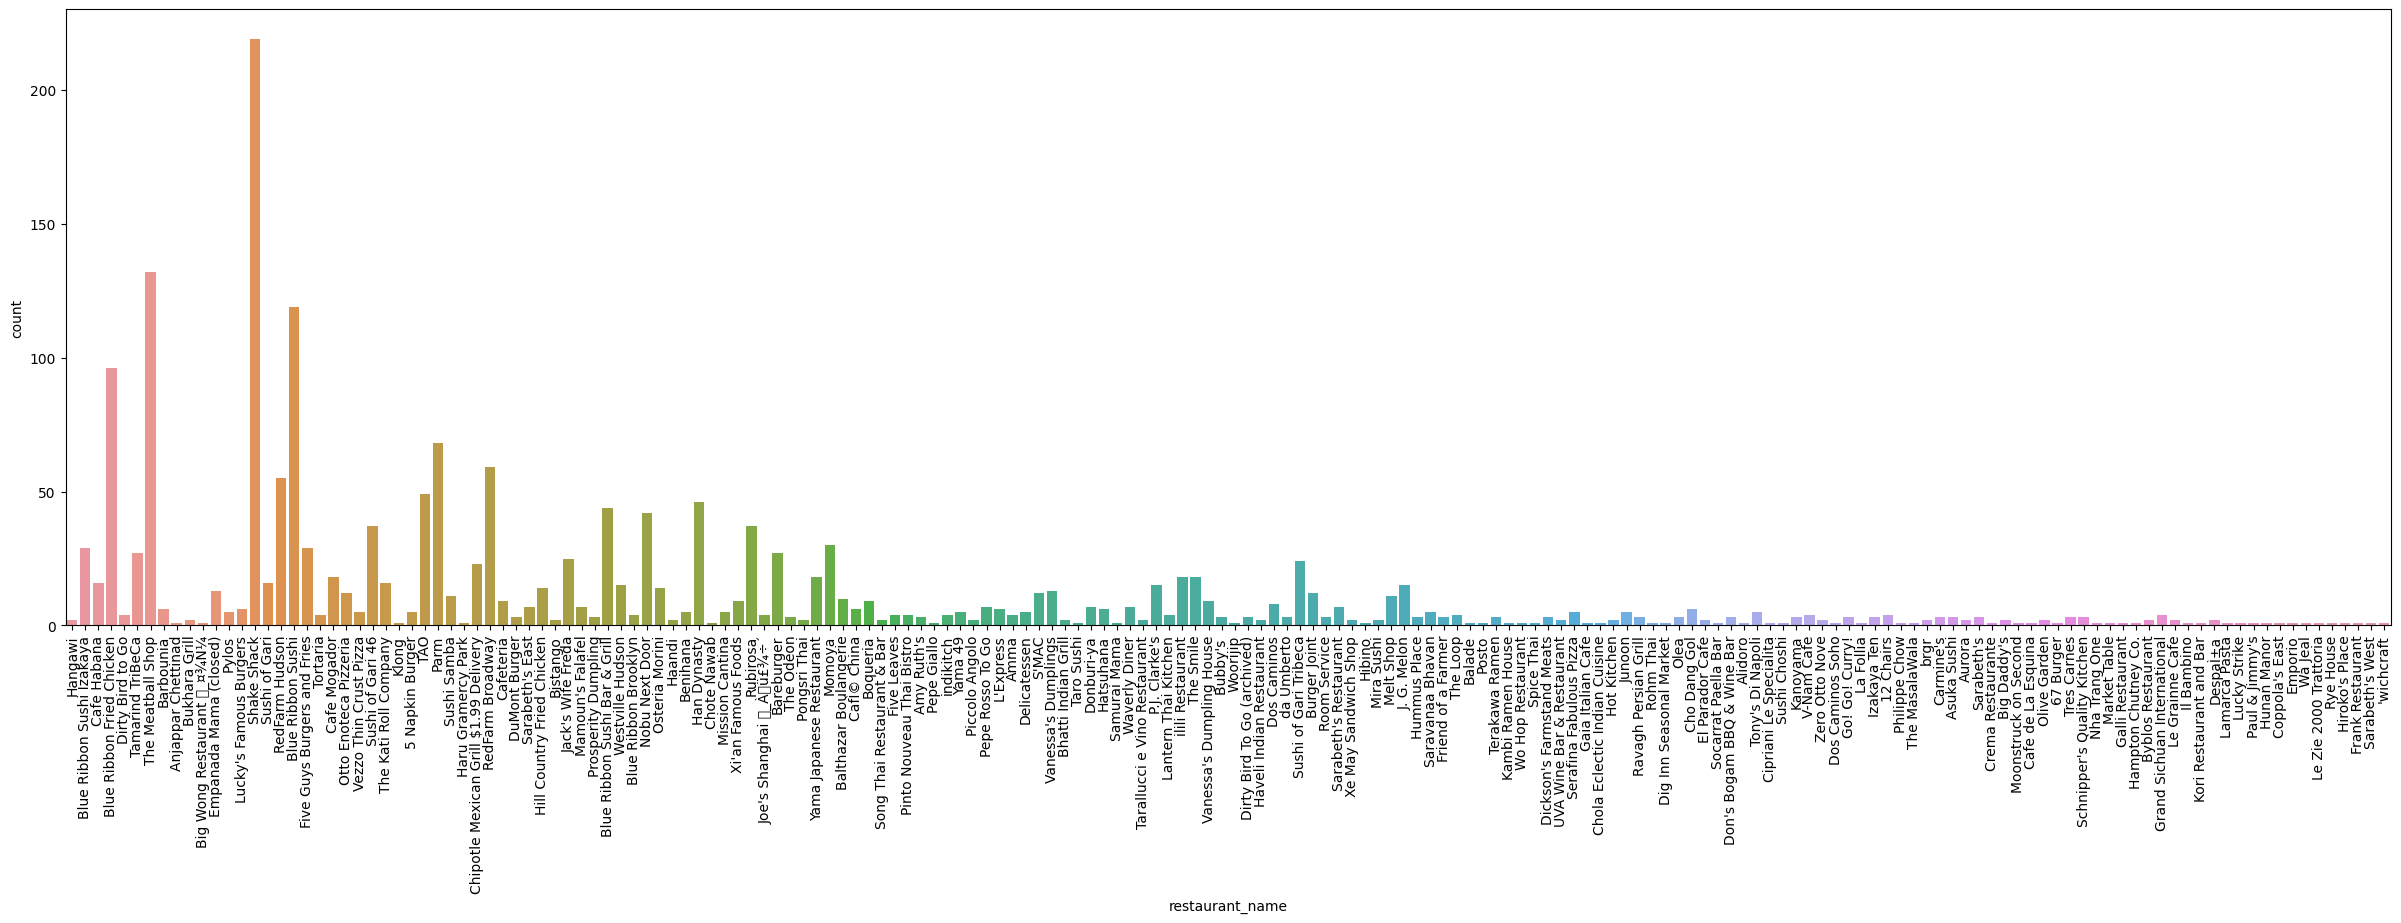

In [12]:
plt.figure(figsize=(30,8))
sns.countplot(data=df, x='restaurant_name');
plt.xticks(rotation=90)
plt.show()

**Observations:**
* Shake Shack Restaurant accounted for the highest number of orders, which is approximately 11.54% (219 out of 1898) of the total orders.

* The Meatball Shop received around 6.96% (132 out of 1898) of the total orders.

* Blue Ribbon Sushi received around 6.27% (119 out of 1898) of the total orders.

* Blue Ribbon Fried Chicken received around 5.06% (96 out of 1898) of the total orders.

#####**Observations on Cuisine Type**

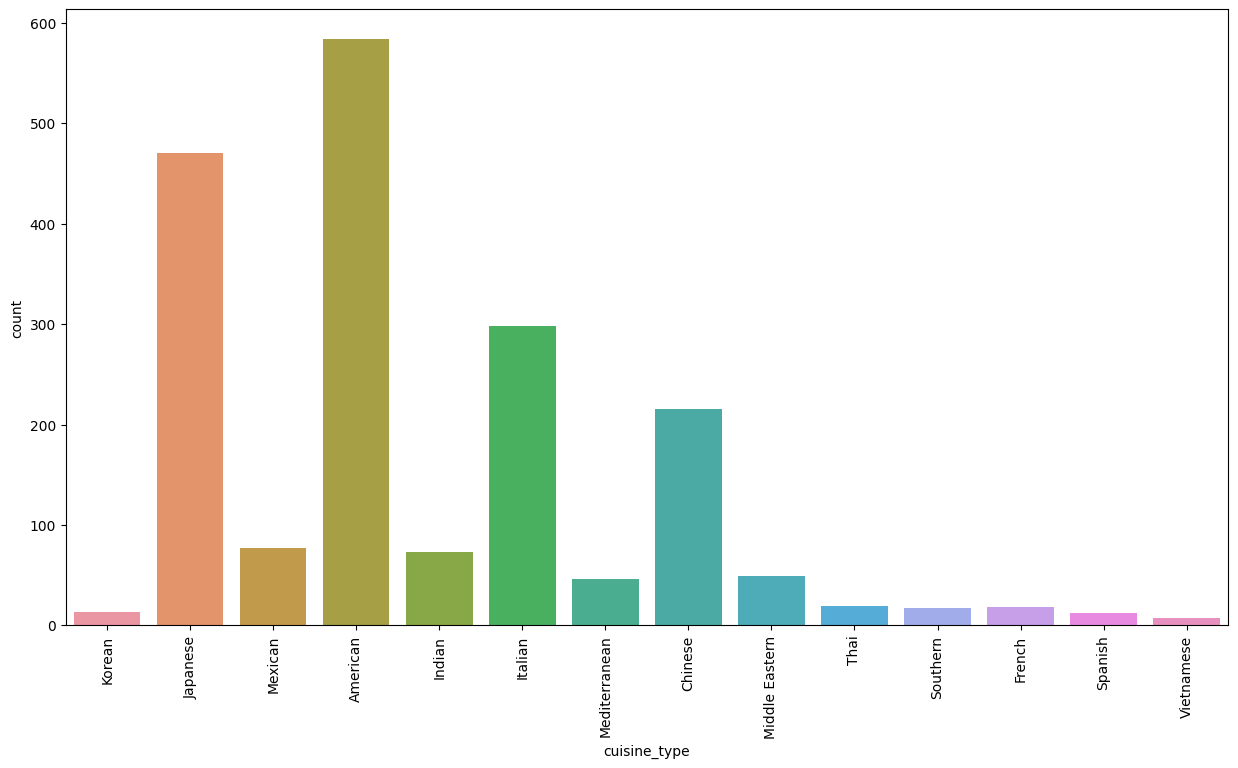

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='cuisine_type');
plt.xticks(rotation=90)
plt.show()

**Observations:**
* The majority of customers, around 31%, ordered American cuisine (584 out of 1898 orders).

* The second most ordered cuisine type was Japanese, with approximately 25% of orders (470 orders).

* Italian cuisine was the third most ordered type, accounting for around 16% of orders (298 orders).

* Vietnamese cuisine had the lowest number of orders, with only around 0.4% of orders (7 orders).

#####**Observations on Day of the Week**

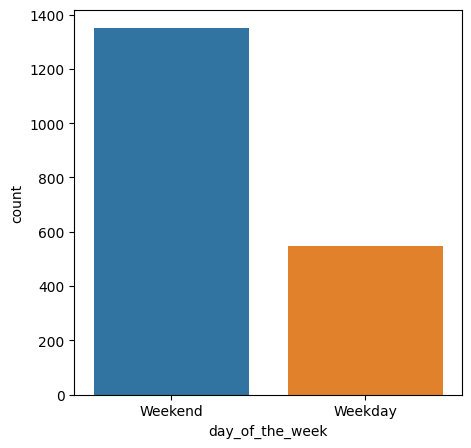

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='day_of_the_week');
plt.xticks(rotation=0)
plt.show()

**Observations:**
* The percentage of orders placed by customers on the Weekend is higher than on the Weekday.

* Approximately 71% of the total orders were placed on the Weekend (Saturday and Sunday), while only 29% of the orders were placed on Weekdays (Monday to Friday).

#####**Observations on Rating**

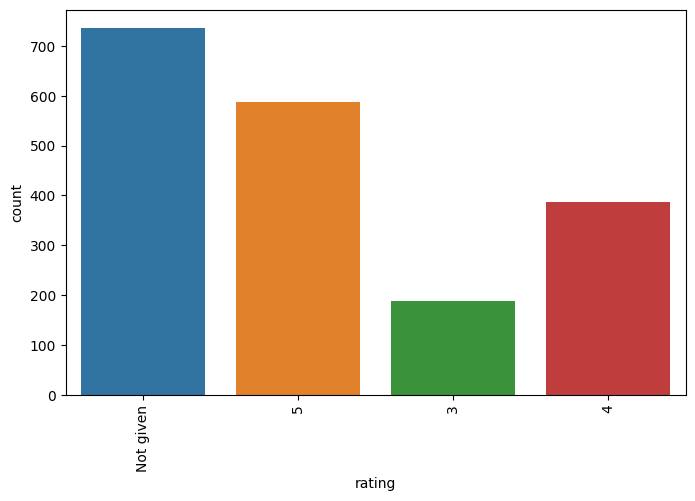

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='rating');
plt.xticks(rotation=90)
plt.show()

**Observations:**
* The majority of the Ratings, about 39%, were not provided by the Customer.

* Approximately 31% of the orders received a rating of 5, with around 20% receiving a rating of 4 and roughly 10% receiving a rating of 3.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

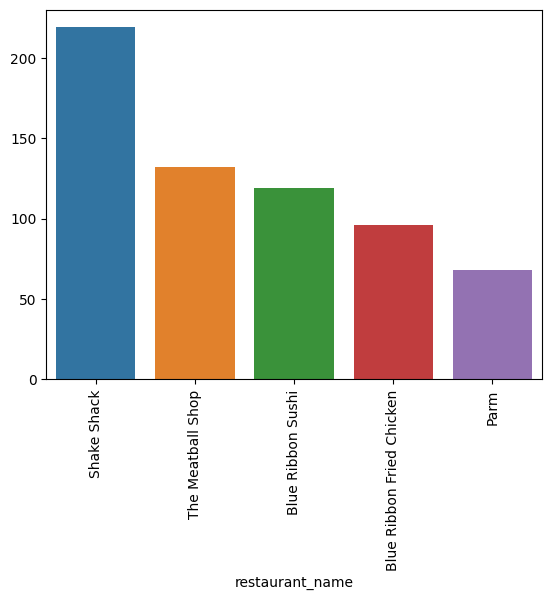

The restaurants that made it to the top 5 list, in descending order, are: ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm']


In [16]:
# Group the dataset by restaurant name and calculate the percentage of orders each restaurant received
top_5_restaurants  = df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=0).head()

# Create a bar plot to showcase the top 5 restaurant names
sns.barplot(x=top_5_restaurants.index, y=top_5_restaurants.values)
plt.xticks(rotation=90)
plt.show()

print(f'The restaurants that made it to the top 5 list, in descending order, are: {top_5_restaurants.index.tolist()}')

**Observations:**
* Out of 1898 orders, the Top 5 Restaurant names and their respective percentages of orders are:


1.   Shake Shack: around 11.54% (219 orders)
2.   The Meatball Shop: around 10.86% (206 orders)
3.   Blue Ribbon Sushi: around 9.58% (182 orders)
4.   Blue Ribbon Fried Chicken: around 8.43% (160 orders)
5.   Parm: around 3.59% (68 orders)

* Therefore, Shake Shack received the highest percentage of orders among the Top 5 restaurants, while Parm received the lowest percentage of orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

The most popular cuisine on weekends is American with highest orders count 415


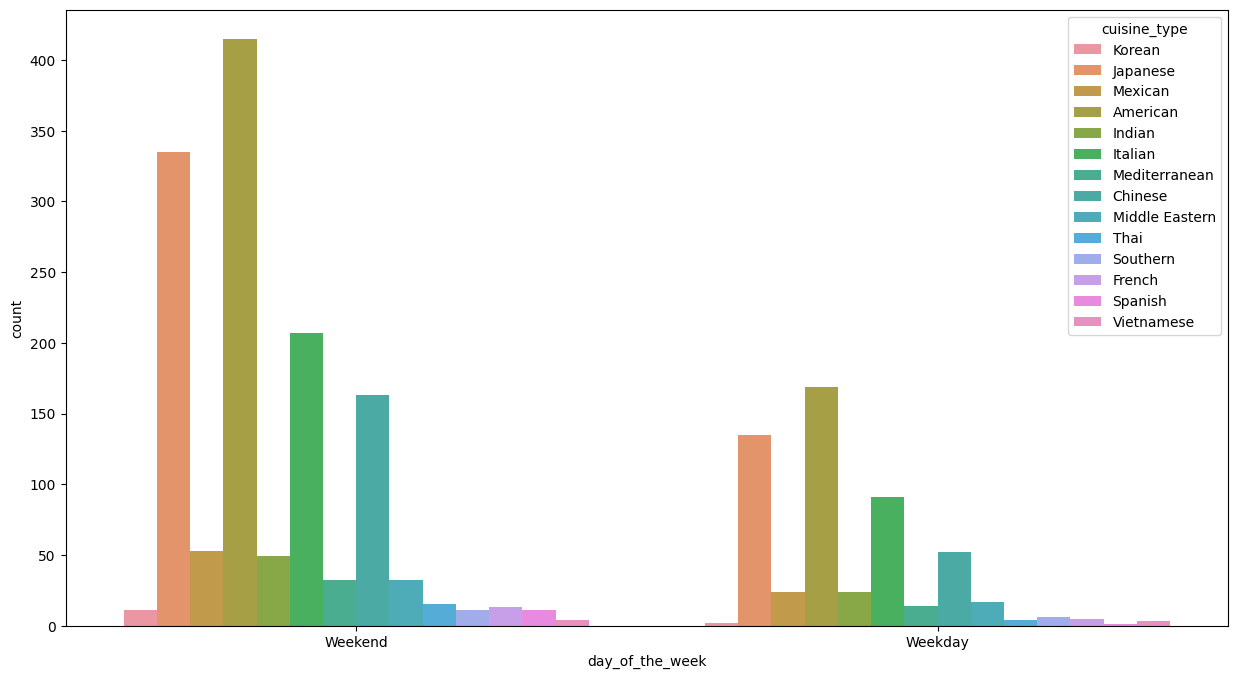

In [17]:
# Groupby function to get the popular cuisine on weekends
top_1_cuisine = df.groupby(["cuisine_type", 'day_of_the_week'])["order_id"].count().sort_values(ascending=0).head(1)
top_1_cuisine_name = top_1_cuisine.index[0][0]
top_1_cuisine_count = top_1_cuisine.values[0]
print('The most popular cuisine on weekends is', top_1_cuisine_name, 'with highest orders count', top_1_cuisine_count)

# Show the Countplot based on the day_of_the_week for all cuisine_types
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='day_of_the_week', hue='cuisine_type')
plt.show()

**Observations:**
* American cuisine is the most popular choice on weekends, accounting for approximately 22% of the total orders in the dataset, with a highest recorded order count of 415.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

29.24% of the orders have a cost greater than 20 dollars.


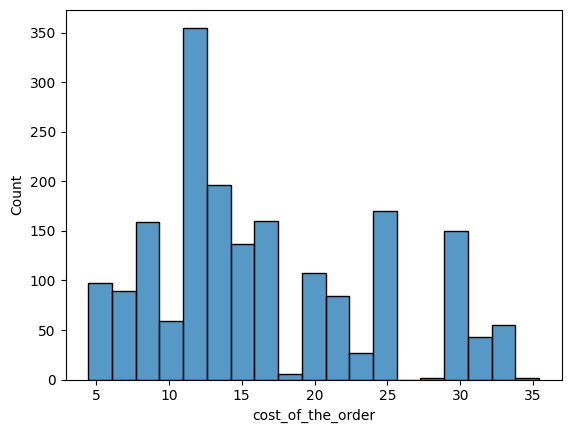

In [18]:
# Get All the Orders cost > 20 dollars
more_than_20 = df[df['cost_of_the_order'] > 20]['order_id'].count()
total_orders = df['order_id'].count()
percentage_more_than_20 = (more_than_20 * 100)/total_orders
print(f'{percentage_more_than_20.round(2)}% of the orders have a cost greater than 20 dollars.')

sns.histplot(data=df, x='cost_of_the_order')
plt.show()

**Observations:**
* 29.24% of the orders have a cost greater than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [19]:
mean_delivery_time = df['delivery_time'].mean()
print(f'The average time it takes to deliver an order is {mean_delivery_time.round(2)} minutes.')

The average time it takes to deliver an order is 24.16 minutes.


**Observations:**
* The average time it takes to deliver an order is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [20]:
# Using Groupby to get the top 3 frequent customers
top_3_customers = df.groupby('customer_id')['order_id'].count().sort_values(ascending=0).head(3)

# Most frequent customer in the first position
print(f'Customer ID {top_3_customers.index[0]} is the most frequent, having placed {top_3_customers.values[0]} orders.')

# Second most frequent customer
print(f'Customer ID {top_3_customers.index[1]} comes in second place in terms of frequency, with {top_3_customers.values[1]} orders.')

# Third most frequent customer
print(f'With {top_3_customers.values[2]} orders, customer ID {top_3_customers.index[2]} takes the third spot for most frequent orders.')

Customer ID 52832 is the most frequent, having placed 13 orders.
Customer ID 47440 comes in second place in terms of frequency, with 10 orders.
With 9 orders, customer ID 83287 takes the third spot for most frequent orders.


**Observations:**
* Customer ID 52832 is the most frequent, having placed 13 orders.

* Customer ID 47440 comes in second place in terms of frequency, with 10 orders.

* With 9 orders, customer ID 83287 takes the third spot for most frequent orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Let us plot multivariate charts between variables to understand their interaction with each other.**

#### **Correlation by Heatmap**

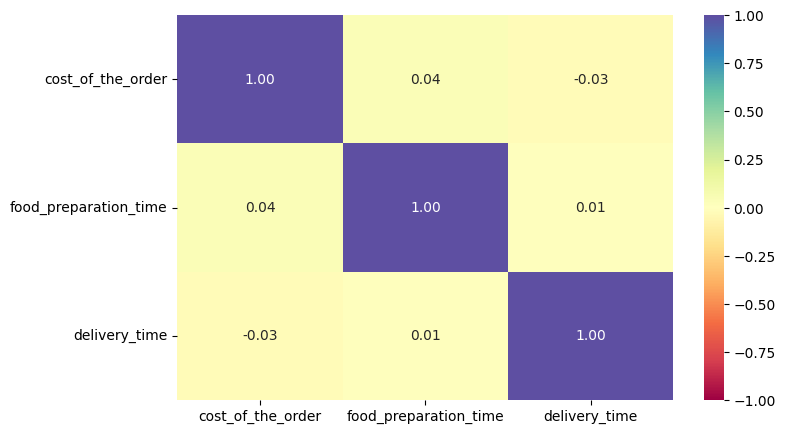

In [21]:
# Checking for Correlation among Numerical variables
num_var = ['cost_of_the_order','food_preparation_time','delivery_time']
corr = df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**
* Delivery time and Cost of the Order have an inverse correlation, meaning that as the Delivery time increases, the Cost of the Order decreases.

* Cost of the Order and Food Preparation time have a direct correlation, indicating that as the Cost of the Order increases, so does the Food Preparation time.

* Delivery time and Food Preparation time have a positive correlation, suggesting that as the Delivery time increases, the Food Preparation time also tends to increase.

* To summarize, based on the data analyzed, it appears that increasing Delivery time could potentially lead to a reduction in the Cost of the Order. However, this needs to be balanced against the fact that a longer Delivery time may also result in longer Food Preparation times.

#### **Plotting numerical variables against the days of the week using pairplot**

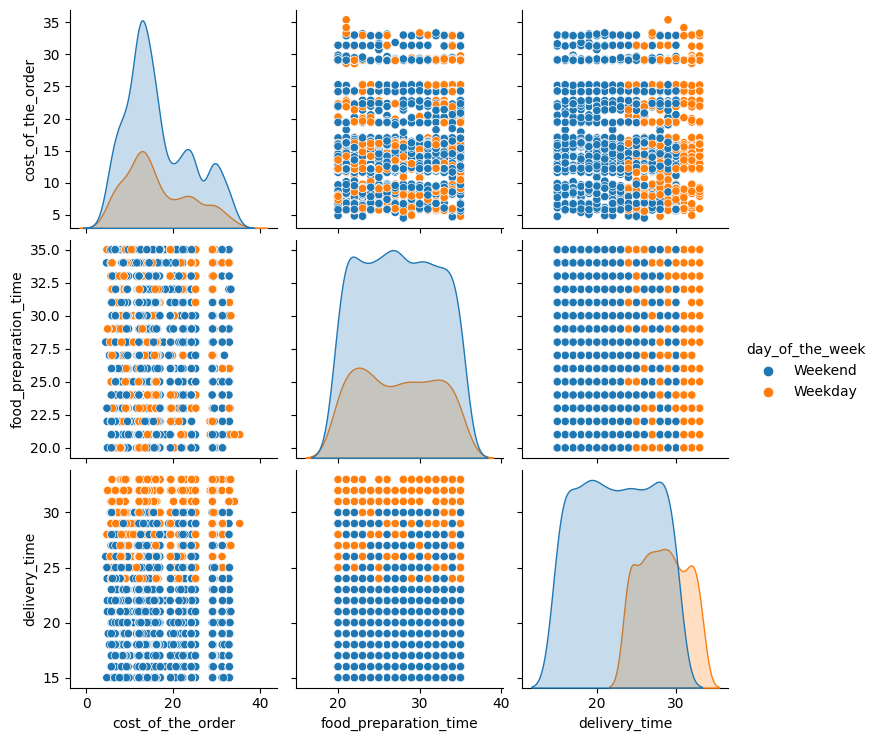

In [22]:
# Create new dataset without Order_id and Customer_id as they are not important for further Multivariate EDA analysis
food_orders = df[['restaurant_name','cuisine_type','cost_of_the_order','day_of_the_week','rating','food_preparation_time','delivery_time']]

# Check Numerical variables with Categorical Variable
sns.pairplot(data=food_orders, kind='scatter', hue='day_of_the_week')
plt.show()

**Observations**
* Based on our analysis, we have found that approximately 75% of the orders placed on weekends with delivery charges ranging between 4 to 25 dollars are delivered within 15 to 30 minutes.

* We have observed that there are some orders on weekdays where food delivery takes longer (more than 30 minutes).

* However, on weekdays, all orders are delivered in around 23 minutes.

* Furthermore, it appears that restaurants receive more orders for food preparation on weekends compared to weekdays, with a minimum preparation time of around 20 minutes and a maximum of around 35 minutes.

#### **Day of the Week-based analysis of Cuisine Ratings using Lineplots**

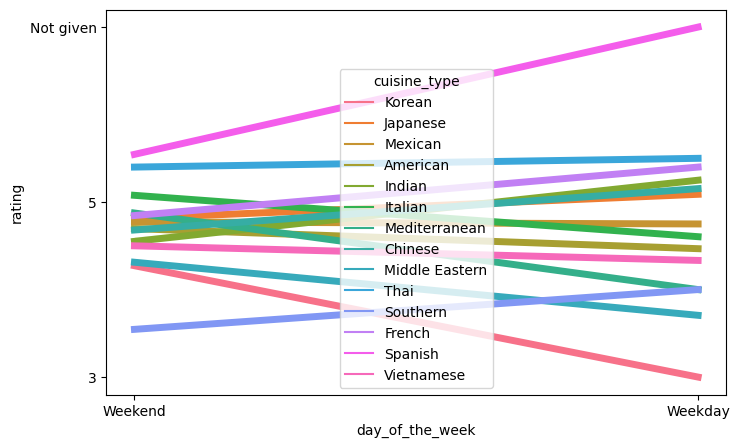

In [23]:
# Check Numerical variables with Categorical Variable
plt.figure(figsize=(8,5))
sns.lineplot(data=food_orders, x='day_of_the_week', y='rating', hue='cuisine_type', errorbar=('ci', False), linewidth=5)
plt.show()

**Observations**
* Spanish Cuisine: Customers tend to give more ratings on weekends than weekdays.

* Korean Cuisine: Customers give fewer ratings on weekdays than on weekends for this cuisine.

* French Cuisine: Both weekdays and weekends receive high ratings of 5 for this cuisine.

#### **Verify the correlation between cuisine types and the duration of food preparation on a particular day of the week**

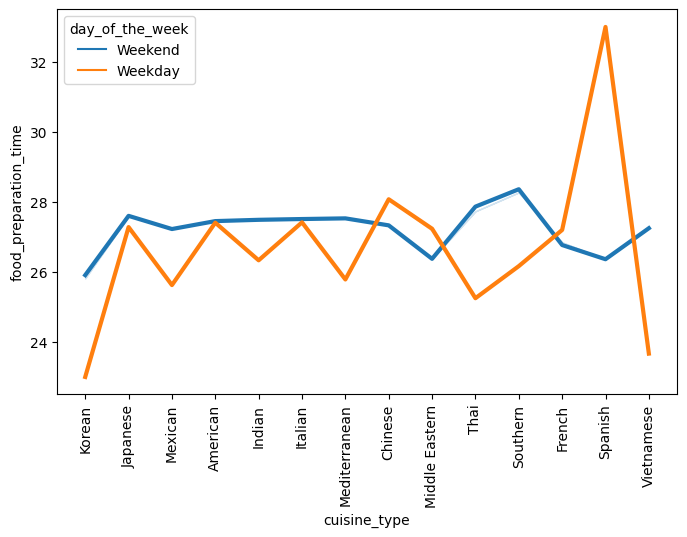

In [24]:
# Verify the duration required to prepare food on particular days for every type of cuisine
plt.figure(figsize=(8,5))
sns.lineplot(data=food_orders, x="cuisine_type", y="food_preparation_time", hue='day_of_the_week', errorbar=('ci', False), linewidth=3)
plt.xticks(rotation=90)
plt.show()

**Observations**
* On weekdays, Korean Cuisine requires the shortest amount of time to prepare compared to other cuisines, taking around 22 minutes.

* The food preparation time for Korean Cuisine is slightly longer on weekends, taking around 26 minutes.

* Spanish Cuisine takes the longest time to prepare on weekdays, with an average of around 31 minutes.

* Southern Cuisine requires the longest preparation time on weekends, taking around 28 minutes.

* Overall, these findings suggest that if time efficiency is a priority for the business, Korean Cuisine may be a good choice for weekdays.
 
* However, if Spanish or Southern Cuisine is offered on the menu, customers should be made aware that they may take longer to prepare, especially during peak hours.

#### **Verify the prices for various cuisine categories across different restaurants**

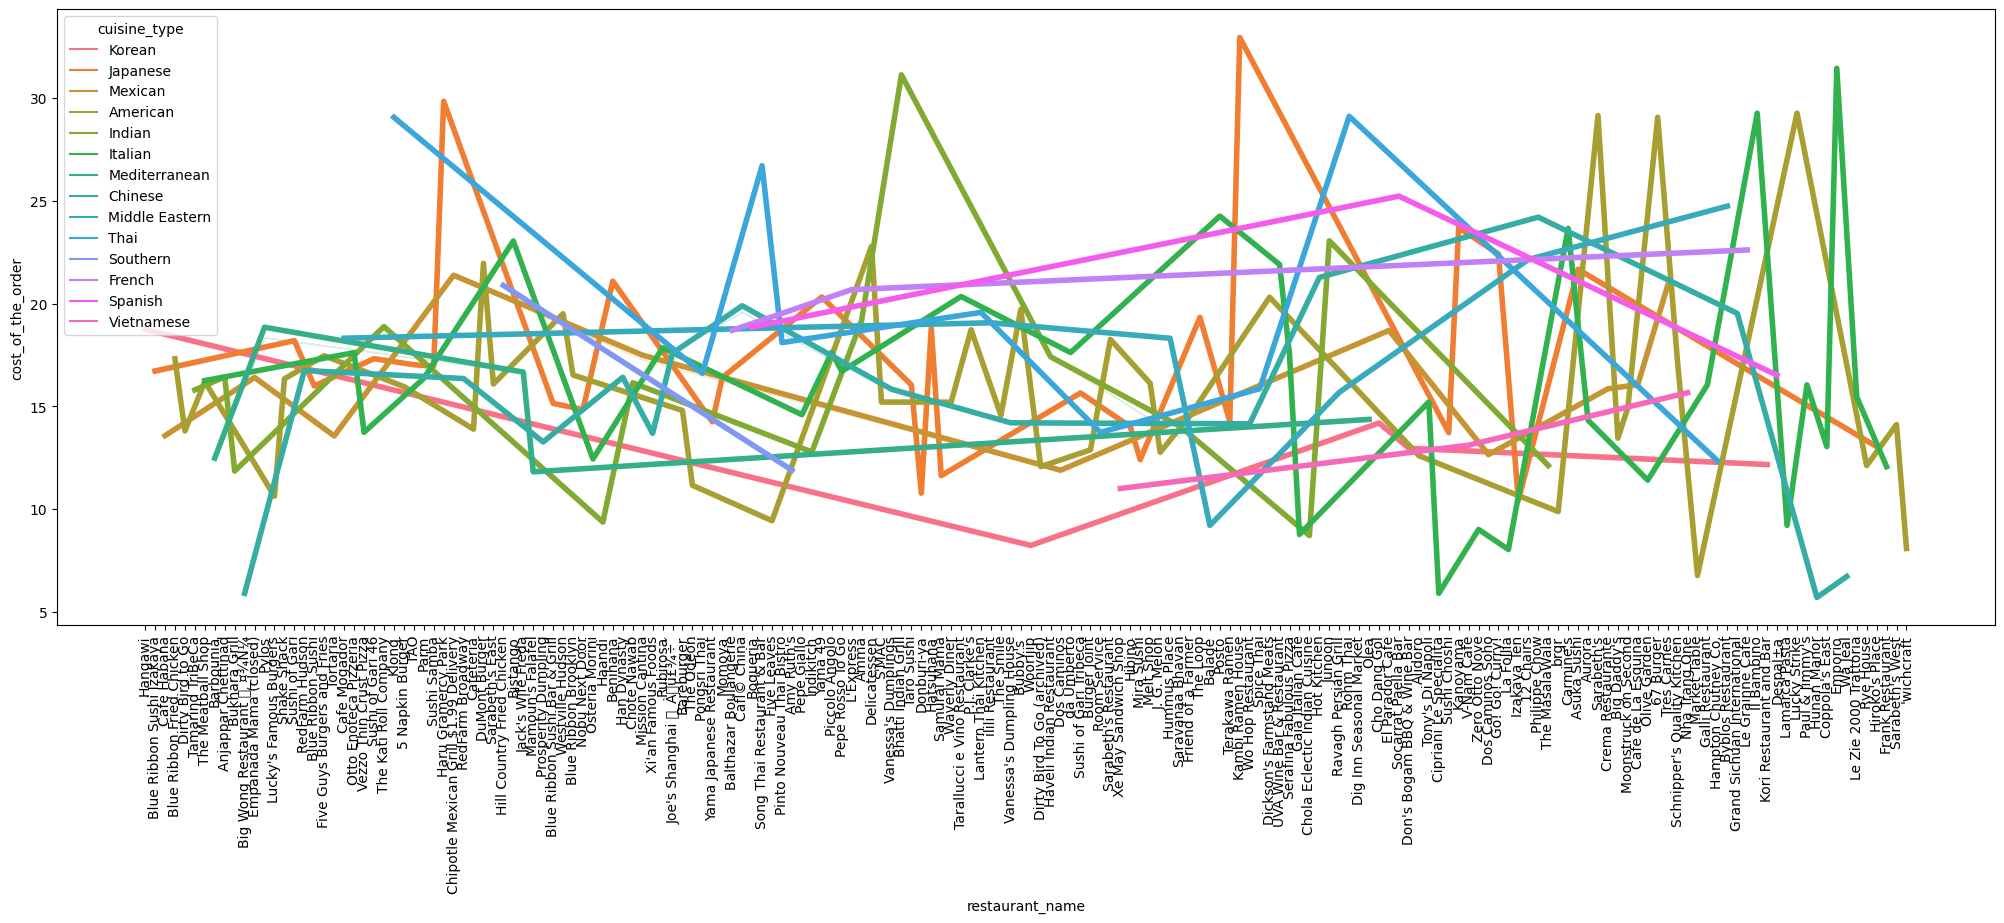

,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
10,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
689,Cipriani Le Specialita,Italian,5.92,Weekend,5,35,30
1632,Hunan Manor,Chinese,5.72,Weekday,5,31,26
497,Kambi Ramen House,Japanese,32.93,Weekend,5,35,19


In [25]:
# Check the Cuisine Cost at the Restaurants 
plt.figure(figsize=(25,8))
sns.lineplot(data=food_orders, x="restaurant_name", y="cost_of_the_order", hue='cuisine_type', errorbar=('ci', False), linewidth=4)
plt.xticks(rotation=90)
plt.show()

# Lowest Cost Order < 6 dollars for Chinese and Italian Cuisines
cheap_order = food_orders[(food_orders.restaurant_name=='Hunan Manor') | (food_orders.restaurant_name.str.contains('Big Wong Restaurant') | (food_orders.restaurant_name.str.contains('Cipriani Le Specialita')))]

# Expensive Order around of 33 dollars for Japanese Cuisines
expensive_order = food_orders[(food_orders.restaurant_name=='Kambi Ramen House') & (food_orders.cost_of_the_order > 32)]

# Concat into one dataset to display the observations
pd.concat([cheap_order, expensive_order])

**Observations**
* Based on our analysis, we found that the restaurants offering Chinese cuisine, namely Hunan Manor and Big Wong Restaurant, as well as the Italian restaurant Cipriani Le Specialita, offer the lowest cost of orders, averaging around 6 dollars.

* On the other hand, we have also identified a restaurant with the highest average order cost, which is the Japanese cuisine restaurant Kambi Ramen House, where prices can reach up to 33 dollars per order. It's important to keep this in mind when considering options for Japanese cuisine dining.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [26]:
# Using the copy() function, generate a fresh dataset to conduct rating-related operations
df_rating = df.copy()

# Convert the categorical value 'Not given' to NaN (Not a Number) and modify the data type to numeric
df_rating['rating'] = df_rating['rating'].replace('Not given', np.nan)
df_rating['rating'] = df_rating['rating'].astype(float)

# Refine the dataset by selecting restaurants that have received a rating count greater than 50
rating_count = df_rating.groupby(['restaurant_name'], as_index=False)['rating'].sum().sort_values(by='rating', ascending=0)
popular_ratings = rating_count[rating_count.rating > 50]
popular_ratings.reset_index(drop=True, inplace=True)

# Refine the dataset by selecting only those records with an average rating higher than 4
average_rating = df_rating.groupby(['restaurant_name'], as_index=False)['rating'].mean().sort_values(by='rating', ascending=0)
average_rating = average_rating[average_rating.rating > 4]
average_rating.reset_index(drop=True, inplace=True)

# Combine the dataset and give new names to the columns
popular_ratings = popular_ratings.merge(average_rating, on=['restaurant_name'])
popular_ratings = popular_ratings.rename(columns={'rating_x':'rating_count', 'rating_y':'rating_average'})

# Final data set comprises of restaurants that possess a rating count exceeding 50 and an average rating higher than 4
popular_ratings


,restaurant_name,rating_count,rating_average
0,Shake Shack,569.0,4.278195
1,The Meatball Shop,379.0,4.511905
2,Blue Ribbon Sushi,308.0,4.219178
3,Blue Ribbon Fried Chicken,277.0,4.328125
4,RedFarm Broadway,174.0,4.243902
5,Parm,161.0,4.128205
6,RedFarm Hudson,142.0,4.176471
7,TAO,122.0,4.357143
8,Han Dynasty,102.0,4.434783
9,Blue Ribbon Sushi Bar & Grill,101.0,4.590909


**Observations:**
* Out of all the restaurants, 25 have ratings greater than 4 and a rating count of more than 50.

* 'Shake Shack' has received the highest rating count of 569, but the average rating is 4.278195.

* 'Sushi of Gari Tribeca' has the highest average rating of 4.615385 among all the restaurants.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [27]:
# Function to calculate the net revenue
def revenue_calc(cost_of_the_order):
  if cost_of_the_order > 20:
    return cost_of_the_order * 0.75
  
  elif cost_of_the_order > 5:
    return cost_of_the_order * 0.85
  
  else:
    return cost_of_the_order

# Utilize the revenue_calc() function on the 'cost_of_the_order' column within the dataset
df['revenue'] = df.cost_of_the_order.apply(revenue_calc)

# Calculate the Net Revenue generated by the company across all orders
revenue_sum = df.revenue.sum()

print(f"The Company's total revenue from all orders amounts to {revenue_sum} dollars.")


The Company's total revenue from all orders amounts to 25148.517 dollars.


**Observations:**
* The Company's total revenue from all orders amounts to 25148.517 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [28]:
## Get the Total_time column
df['total_time'] = df.food_preparation_time + df.delivery_time

## Calculate the Percenateg of orders with total_time > 60 minutes
percent_late_orders = len(df[df.total_time > 60]) * 100 / len(df)

print(f'{percent_late_orders:.2f}% of orders take more than 60 minutes to get delivered from the time the order is placed.\n')

## All orders having total_time > 60 minutes
df[df.total_time > 60]

10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,5.0745,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,5.0320,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,13.7700,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,13.4810,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,17.0625,64
...,...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,16.4900,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,Not given,35,28,16.7325,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,10.3955,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,11.8745,62


**Observations:**
* 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

The Mean Delivery Time on Weekday is around 28.34 minutes and Weekend is around 22.47 minutes.



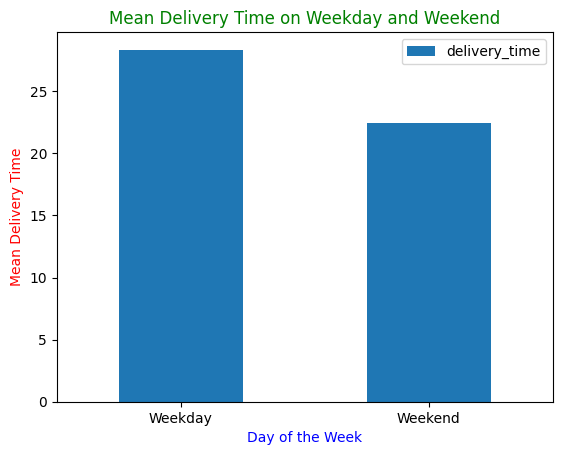

In [29]:
# Using Groupby function, Get the mean delivery time 
mean_delivery_time = df.groupby('day_of_the_week', as_index=False)['delivery_time'].mean()

print(f'The Mean Delivery Time on Weekday is around {mean_delivery_time.delivery_time[0]:.2f} minutes and Weekend is around {mean_delivery_time.delivery_time[1]:.2f} minutes.\n')

# Show the Mean delivery time on Barplot
mean_delivery_time.plot(kind='bar')
plt.title('Mean Delivery Time on Weekday and Weekend', color='g')
plt.xlabel('Day of the Week', color='b')
plt.ylabel('Mean Delivery Time', color='r')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
plt.show()

**Observations:**
* The average delivery time during weekdays is approximately 28.34 minutes, while on weekends it is around 22.47 minutes.

* The delivery time during weekdays averages 5.87 minutes longer than that of weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

Based on our analysis of the FoodHub dataset consisting of nearly 1.9k food orders from various restaurants, we have gained valuable insights that can aid in enhancing the company's business. Through descriptive analysis and visualizations, we have identified the following key findings:

1. Orders placed on weekends with delivery charges ranging from 4 to 25 dollars are typically delivered faster than on weekdays, with all orders on weekdays typically delivered within 23 minutes.

2. Restaurants receive more orders for food preparation on weekends compared to weekdays, with a minimum preparation time of around 20 minutes and a maximum of around 35 minutes.

3. Customers tend to give more ratings for Spanish Cuisine on weekends, while for Korean Cuisine, they give fewer ratings on weekdays than on weekends. However, both weekdays and weekends receive high ratings of 5 for French Cuisine.

4. Korean Cuisine requires the shortest amount of time to prepare compared to other cuisines, taking around 22 minutes on weekdays, and the preparation time for Korean Cuisine is slightly longer on weekends, taking around 26 minutes. Spanish Cuisine takes the longest time to prepare on weekdays, with an average of around 31 minutes, while Southern Cuisine requires the longest preparation time on weekends, taking around 28 minutes.

5. Hunan Manor and Big Wong Restaurant offer the lowest cost of orders, averaging around 6 dollars, while Kambi Ramen House has the highest average order cost, with prices reaching up to 33 dollars per order.

6. Among the top five restaurants in terms of order frequency, Shake Shack received the highest percentage of orders, accounting for approximately 11.54% or 219 orders, while Parm had the lowest percentage of orders at around 3.59% or 68 orders.

7. American cuisine is the most popular choice on weekends, accounting for approximately 22% of total orders, with the highest number of orders for American cuisine being 415.

8. There is an inverse relationship between Delivery time and Cost of the Order, meaning that as Delivery time increases, the Cost of the Order decreases. However, longer Delivery times may also result in longer Food Preparation times, which should be considered.

9. Overall, these findings can be used to inform business decisions, such as choosing which cuisines to offer on which days, considering the trade-off between delivery time and cost, and identifying popular restaurants and dishes.

### Recommendations:

Based on the conclusions drawn from the analysis of the FoodHub dataset, here are some recommendations to help improve the business:

1. Optimize delivery strategies: Since orders placed on weekends with higher delivery charges tend to be delivered faster, consider implementing variable delivery charges based on the day of the week. This can incentivize customers to place orders on weekdays by offering faster delivery at a reasonable cost.

2. Adjust staffing and preparation times: Given that restaurants receive more orders on weekends and have longer preparation times for certain cuisines, ensure that staffing levels are adequate during peak hours on weekends. Additionally, optimize kitchen processes to minimize preparation time, especially for cuisines like Spanish and Southern, which require longer preparation.

3. Highlight popular cuisines on specific days: Capitalize on customer preferences by strategically offering cuisines based on their popularity on certain days. For example, promote Spanish Cuisine on weekends when customers tend to give more ratings, and emphasize Korean Cuisine on weekdays to increase ratings.

4. Evaluate menu offerings and preparation times: Analyze the preparation times for different cuisines and consider adjusting the menu accordingly. If a particular cuisine consistently takes longer to prepare, explore ways to streamline the process or offer alternative dishes that have shorter preparation times.

5. Price optimization and menu diversity: Review the average order costs for different restaurants and consider adjusting prices to ensure competitiveness. Additionally, assess the menu diversity to cater to a wide range of customers and accommodate varying budget preferences.

6. Partner with popular restaurants: Identify popular restaurants like Shake Shack and Parm, which receive a high percentage of orders, and consider building stronger partnerships with them. Collaborate on marketing efforts or offer exclusive deals to promote their dishes and attract more customers.

7. Promote American cuisine on weekends: As American cuisine is the most popular choice on weekends, allocate marketing resources to promote American dishes during those days. Highlight popular American dishes and create special offers to further encourage customers to order American cuisine.

8. Balance delivery time and cost: Consider the trade-off between delivery time and cost when setting delivery charges. While longer delivery times may lead to lower costs for customers, it's essential to ensure that longer delivery times do not significantly increase food preparation times, which could impact customer satisfaction.

9. Monitor customer feedback: Continuously monitor customer feedback ratings and reviews to identify areas for improvement. Pay close attention to negative feedback related to delivery time, food preparation, or specific cuisines, and take proactive measures to address those concerns.

10. Data-driven decision-making: Utilize data analytics to further understand customer behavior, preferences, and trends. Continuously analyze the dataset to gain insights that can inform strategic business decisions, including menu planning, marketing campaigns, and operational improvements.

By leveraging these recommendations, the business can optimize its operations, improve customer satisfaction, and drive growth based on the valuable insights derived from the FoodHub dataset.

---